# Module 3: Machine Learning

## Sprint 1: Supervised Machine Learning Fundamentals

## Part 5: Travel Insurance Prediction

## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will analyse the Travel Insurance Prediction dataset.
You will have to apply all that you have learned about Machine Learning to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Objectives for this Part

- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using linear machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Travel Insurance Prediction Data](https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data).
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Apply various machine learning models to predict the TravelInsurance column using the other features. This should include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Model's performance. How well did your model perform the predictions?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Correction

During your project correction, you should present it as if talking to a technical team lead and a senior co-worker working in your team.
You can assume that they will have strong data science and software engineering skills - they will understand technical jargon, they are expected to notice things that could have been done better, ask about the choices you've made (especially if you've made some questionable choices).
In addition, be careful not to spend your time explaining trivial concepts or code snippets that are simple - your best bet is to focus your presentation on the more difficult portions of your code.

During a correction, you may get asked questions that test your understanding of covered topics.

- How does hyperparameter tuning work? Why do we use hyperparameter tuning?
- How are random forests trained and used for inference? What are the most important hyperparameters for random forests?
- What are SVMs? What are the most important hyperparameters for SVMs?
- How would you construct a preprocessing pipeline for a random forest model?


# Travel insurance prediction

The aim of this project is build a machine learning model that predicts whether or not a person will be interested in buying the travel insurance package based on certain parameters given below:
- Age - Age Of The Customer
- Employment Type - The Sector In Which Customer Is Employed
- GraduateOrNot - Whether The Customer Is College Graduate Or Not
- AnnualIncome - The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
- FamilyMembers - Number Of Members In Customer's Family
- ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
- FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
- EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
- TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## EDA

In [1]:
try:
  import matplotlib
  assert matplotlib.__version__=='3.4.0'
except AssertionError:
  !pip install matplotlib==3.4.0
  !pip install yellowbrick
  !pip install scikit-lego

  import os
  os.kill(os.getpid(), 9)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
!gdown 1IUq1xW7ewuSDM25chE6apj4GmkQfSG86

Downloading...
From: https://drive.google.com/uc?id=1IUq1xW7ewuSDM25chE6apj4GmkQfSG86
To: /content/TravelInsurancePrediction.csv
100% 115k/115k [00:00<00:00, 61.8MB/s]


In [4]:
tra_ins_df = pd.read_csv('TravelInsurancePrediction.csv', index_col=0)

In [5]:
tra_ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


From here we see that this dataset has no missing values. Also we can see the dtypes of each column.

Before we start analyzing and transforming the data let's first create a hold/test set which we will leave to evaluate the model.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_df, test_df = train_test_split(tra_ins_df, test_size=0.2, random_state=0)

In [8]:
train_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
159,27,Government Sector,Yes,900000,7,1,No,No,0
799,31,Government Sector,Yes,1200000,3,0,No,No,0
318,34,Government Sector,Yes,1100000,3,0,No,No,1
1399,25,Private Sector/Self Employed,No,600000,3,1,No,No,0
465,26,Private Sector/Self Employed,Yes,1500000,5,0,Yes,Yes,1


In [9]:
train_df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1589.000000,1.589000e+03,1589.000000,1589.000000,1589.000000
mean,29.660793,9.201385e+05,4.775960,0.278792,0.359975
std,2.927349,3.754431e+05,1.609997,0.448546,0.480144
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.200000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [10]:
train_df.describe(include='object')

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1589,1589,1589,1589
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1124,1356,1280,1289


From the describe generated statistical summaries we can see that most features are categorical and only Age, AnnualIncome, FamilyMembers are numeric and of type int. Also, all the clients in the dataset are between 25-35 of age and have an annual average income of 92K rupees. Most clients seem to have 5 family members on average.

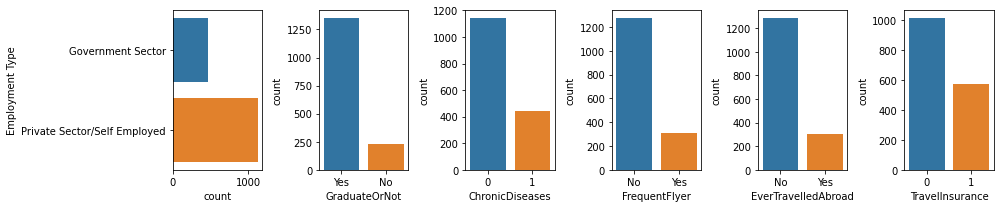

In [11]:
cols = train_df.drop(columns=['Age','AnnualIncome','FamilyMembers']).columns

fig, ax = plt.subplots(1,len(cols),figsize=(14,3))

for i in range(len(cols)):
  if i==0:
    sns.countplot(
        data=train_df,
        y=cols[i],
        ax=ax[i]
    )
  else:
    sns.countplot(
        data=train_df,
        x=cols[i],
        ax=ax[i]
    )

plt.tight_layout()
plt.show()

All of these categorical features are unbalanced, also we will be able to convert them into binary features due to them all having just two categories.

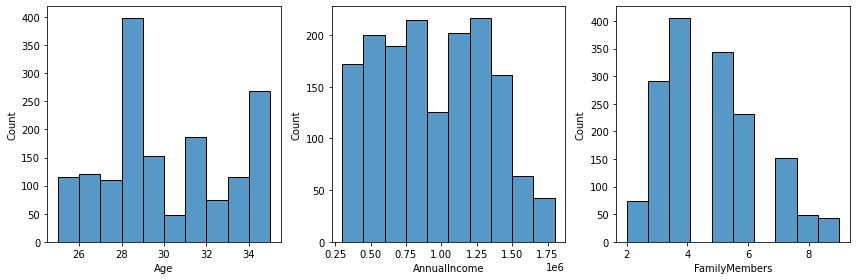

In [12]:
cols = ['Age','AnnualIncome','FamilyMembers']

fig, ax = plt.subplots(1,len(cols),figsize=(12,4))

for i in range(len(cols)):
  sns.histplot(
      data=train_df,
      x=cols[i],
      ax=ax[i],
      bins=10
  )

plt.tight_layout()
plt.show()

Seems like the distributions are multi modal.

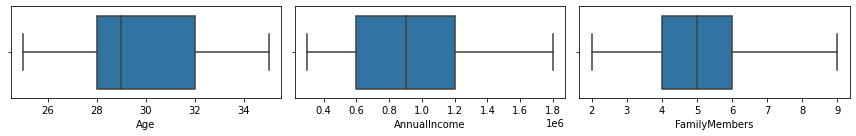

In [13]:
fig, ax = plt.subplots(1,len(cols),figsize=(12,2))

for i in range(len(cols)):
  sns.boxplot(
      data=train_df,
      x=cols[i],
      ax=ax[i]
  )

plt.tight_layout()
plt.show()

The boxplots show no outliers as it is visible from the histograms.

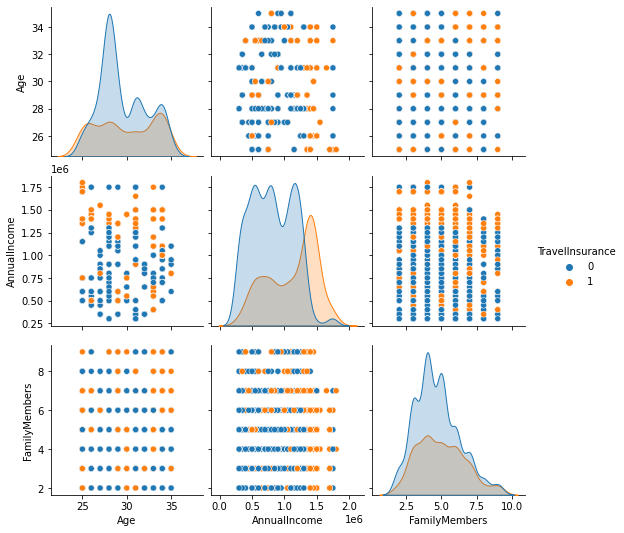

In [14]:
sns.pairplot(
    data=train_df[['Age','AnnualIncome','FamilyMembers','TravelInsurance']],
    hue='TravelInsurance'
)

plt.show()

As seen from the scatter plots the features do not seem to be correlated with each other in any way. Also, in terms of linear separability of TravelInsurance AnnualIncome feature seem to show some promise, because we can see that people with higher annual income tend to buy the insurance more.

In [15]:
pd.crosstab(
    train_df['TravelInsurance'],
    [
        train_df['Employment Type'],
        train_df['ChronicDiseases'],
        train_df['EverTravelledAbroad'],
        train_df['GraduateOrNot']
    ],
).style.background_gradient(axis=None, cmap='cividis')

From the table we can see that the most common combination where TravelInsurance results in 1 is a client who works in a private sector or is self employed, is graduated, doesn't have a chronic disease and has traveled abroad. On the other hand, the most common combination where TravelInsurance results in 0 is a client who works in a private sector or is self employed, is graduated, doesn't have a chronic disease and hasn't traveled abroad.

**Statistical testing**

It would be useful to perform some statistical tests to find out if there is any significant difference in proportions of all binary features. The test would be performed to see if there is a significant difference in proportions of, for example in terms of feature GraduateOrNot, in two groups of people that did buy the insurance and those that didn't. So the null hypothesis would be that there is no difference in proportions in terms of a certain binary feature.

- H<sub>0</sub>: there is no difference in proportions of buy and no buy groups in terms of a certain binary feature (p - p = 0);
- H<sub>a</sub>: there is a difference in proportions of buy and no buy groups in terms of a certain binary feature (p - p >< 0);

Significance level - 95%

In [16]:
buy_ins_df = pd.get_dummies(
    train_df[train_df['TravelInsurance']==1][[
        'Employment Type',
        'GraduateOrNot',
        'ChronicDiseases',
        'FrequentFlyer',
        'EverTravelledAbroad'
    ]], 
    drop_first=True
)

no_buy_ins_df = pd.get_dummies(
    train_df[train_df['TravelInsurance']==0][[
        'Employment Type',
        'GraduateOrNot',
        'ChronicDiseases',
        'FrequentFlyer',
        'EverTravelledAbroad'
    ]], 
    drop_first=True
)

In [17]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

for col in buy_ins_df.columns:

  group1 = buy_ins_df[col]

  group2 = no_buy_ins_df[col].sample(buy_ins_df.shape[0],random_state=0)

  n_successes = np.array([
      group1.sum(),
      group2.sum()
  ])

  sample_sizes = np.array([
      group1.shape[0], 
      group2.shape[0]
  ])

  zstat, pvalue = proportions_ztest(
      count=n_successes,
      nobs=sample_sizes,
      alternative='two-sided'
  )

  print('-'*150)

  print(f'Proportion test results of feature {col}:\n')

  print(f'zstat: {zstat:.4f}, pvalue: {pvalue:.4f}\n')

  if pvalue > alpha:
    print(f'P value is more than alpha {alpha},'
    +' so we fail to reject the null hypothesis')
  else:
    print(f'P value is less than alpha {alpha}, so we can reject the null'
    +' hypothesis and suggest the alternative hypothesis is true')

  print('-'*150+'\n\n')

------------------------------------------------------------------------------------------------------------------------------------------------------
Proportion test results of feature ChronicDiseases:

zstat: -0.5211, pvalue: 0.6023

P value is more than alpha 0.05, so we fail to reject the null hypothesis
------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------
Proportion test results of feature Employment Type_Private Sector/Self Employed:

zstat: 5.8792, pvalue: 0.0000

P value is less than alpha 0.05, so we can reject the null hypothesis and suggest the alternative hypothesis is true
------------------------------------------------------------------------------------------------------------------------------------------------------


---

From the results we can see that there are a few features where there is barely any difference in proportion like ChronicDiseases and GraduateOrNot, but other seem to be significant. So this would mean that these features probably will not provide a lot of differentiation in classifying whether a client will buy the insurance.

## Preparing data for training

Before training different models with data let's create a data pipeline which will take care of all the preprocessing needed for this data like categorical feature encoding or numeric feature standartization.

In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


num_features = ['Age', 'AnnualIncome', 'FamilyMembers']

num_transformer = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="median")), 
        ("scaler", StandardScaler())
    ]
)


cat_features = [
    'Employment Type', 'GraduateOrNot','ChronicDiseases', 'FrequentFlyer',
    'EverTravelledAbroad'
]

cat_transformer = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy="most_frequent")), 
        ("oh_encoder", OneHotEncoder(drop='first', handle_unknown="ignore"))
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ]
)

X_train = train_df.drop(columns='TravelInsurance')
y_train = train_df['TravelInsurance']

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'AnnualIncome', 'FamilyMembers']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Employment Type', 'GraduateOrNot',
                                  'ChronicDiseases', 'FrequentFlyer',
                                  'EverTravelledAbroad'])])

## Shortlisting models

First let's try shorlisting some promising models by training them with default parameters.

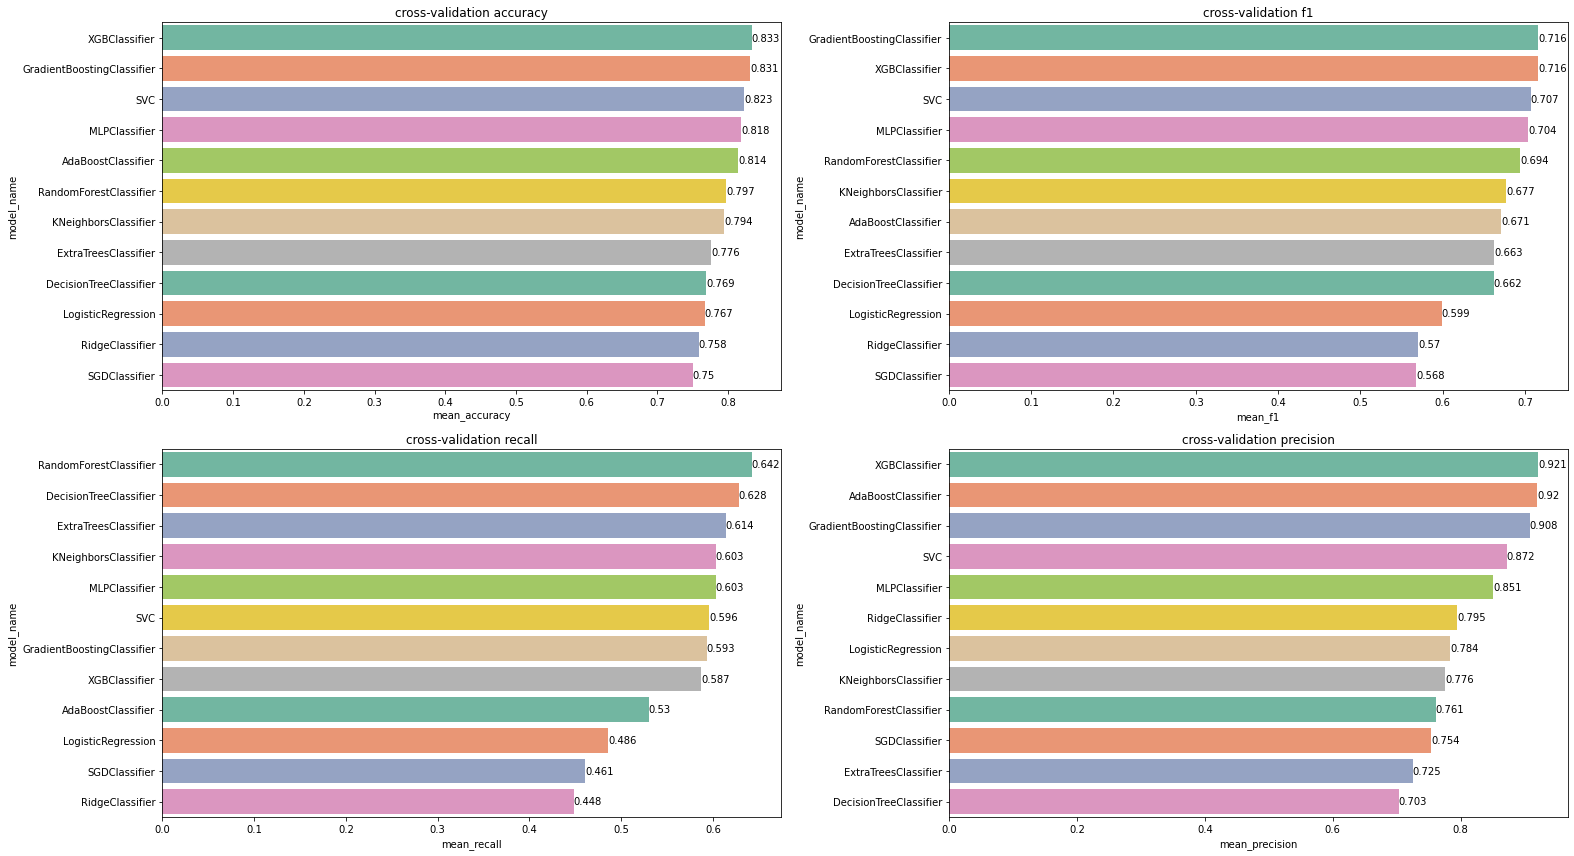

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, \
RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from collections import defaultdict

folds = 5

scoring = ['accuracy', 'f1', 'recall', 'precision']

plot_data = defaultdict(list)

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    LogisticRegression(),
    SGDClassifier(),
    RidgeClassifier(),
    KNeighborsClassifier(),
    XGBClassifier(),
    MLPClassifier()
]

for clf in classifiers:
  clf_pipeline = Pipeline(
      steps = [
          ('preprocessor', preprocessor),
          ('classifier', clf)
      ]
  )

  result = cross_validate(
      clf_pipeline,
      X_train,
      y_train,
      cv=folds,
      scoring=scoring,
      n_jobs=-1
  )

  plot_data['model_name'].append(clf_pipeline['classifier'].__class__.__name__)

  plot_data['mean_f1'].append(result['test_f1'].mean().round(3))
  plot_data['std_f1'].append(result['test_f1'].std().round(3))

  plot_data['mean_recall'].append(result['test_recall'].mean().round(3))
  plot_data['std_recall'].append(result['test_recall'].std().round(3))
  
  plot_data['mean_precision'].append(result['test_precision'].mean().round(3))
  plot_data['std_precision'].append(result['test_precision'].std().round(3))

  plot_data['mean_accuracy'].append(result['test_accuracy'].mean().round(3))
  plot_data['std_accuracy'].append(result['test_accuracy'].std().round(3))

plot_data_df = pd.DataFrame(plot_data)


n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(22,12))

curr_score = 0

for i in range(n_rows):
  for j in range(n_cols):
    order = plot_data_df.sort_values(
        by=f'mean_{scoring[curr_score]}', 
        ascending=False
    ).model_name

    sns.barplot(
        data=plot_data_df.round(3),
        y='model_name',
        x=f'mean_{scoring[curr_score]}',
        palette='Set2',
        order=order,
        ax=ax[i][j]
    )

    ax[i][j].bar_label(ax[i][j].containers[0])

    ax[i][j].set_title(f'cross-validation {scoring[curr_score]}')

    curr_score += 1

plt.tight_layout()

We see that tree and boosting models perform quite well. KNN, MLP and SVC are also worth considering, but the linear models like LogisticRgression, SGDClassifier, RidgeClassifier seem to perform the worst in comparison.

**Feature importance**

Some models can show the importance of each feature, so let's see which features have the most effect.

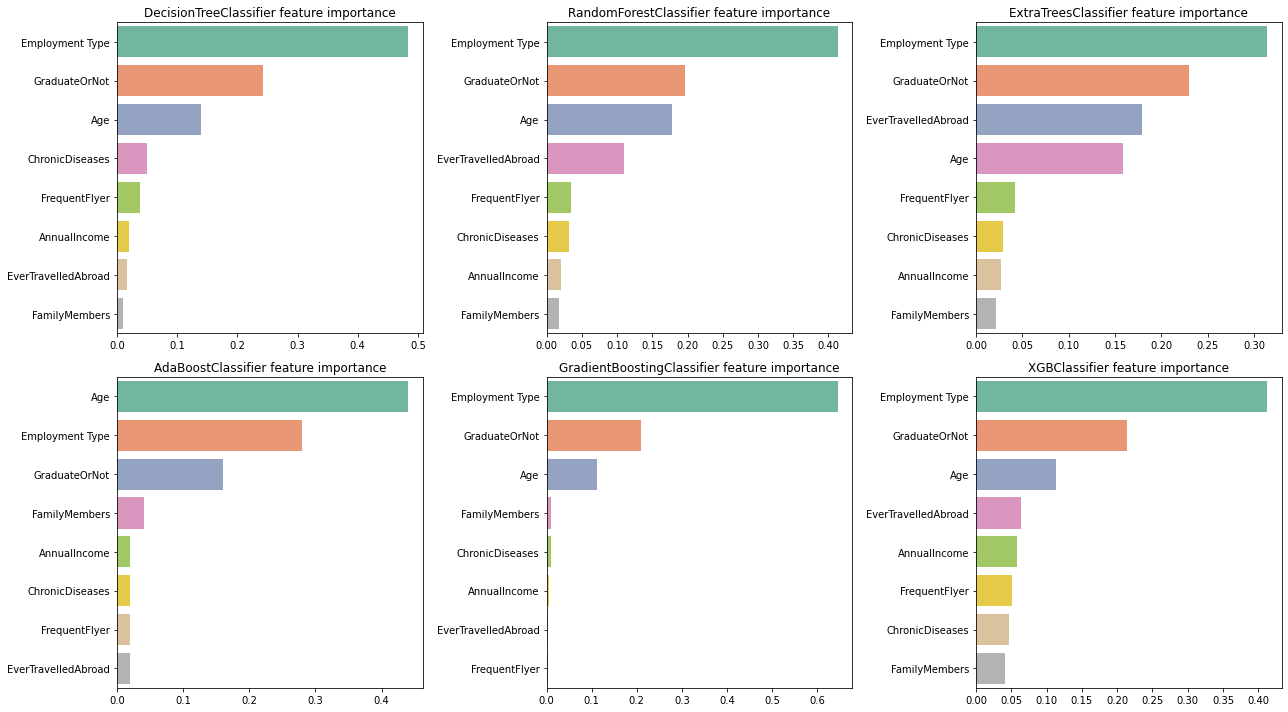

In [27]:
imp_models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

fig, ax = plt.subplots(2, 3, figsize=(18,10))

for i, clf in enumerate(imp_models):

  clf_pipeline = Pipeline(
      steps = [
          ('preprocessor', preprocessor),
          ('classifier', clf)
      ]
  )

  clf_pipeline.fit(
      X_train,
      y_train
  )

  imp_series = pd.Series(
      index=clf_pipeline.feature_names_in_,
      data=clf_pipeline.named_steps['classifier'].feature_importances_
  ).sort_values(ascending=False)

  sns.barplot(
      x=imp_series.values,
      y=imp_series.index,
      palette='Set2',
      ax=ax[1 if i>2 else 0][i-3 if i>2 else i]
  )

  name = clf.__class__.__name__

  ax[1 if i>2 else 0][i-3 if i>2 else i].set_title(f'{name} feature importance')

plt.tight_layout()

It seems that the most differenciating factor for whether or not a person will buy the insurance is EmploymentType. Other important features are Age, GraduatedOrNot and EverTraveledAbroad. The rest of the features, in some cases, are barely used by the classifier at all.

We can add a feature selection method to the model pipeline like SelectFromModel which will select the best features using a specified estimator.

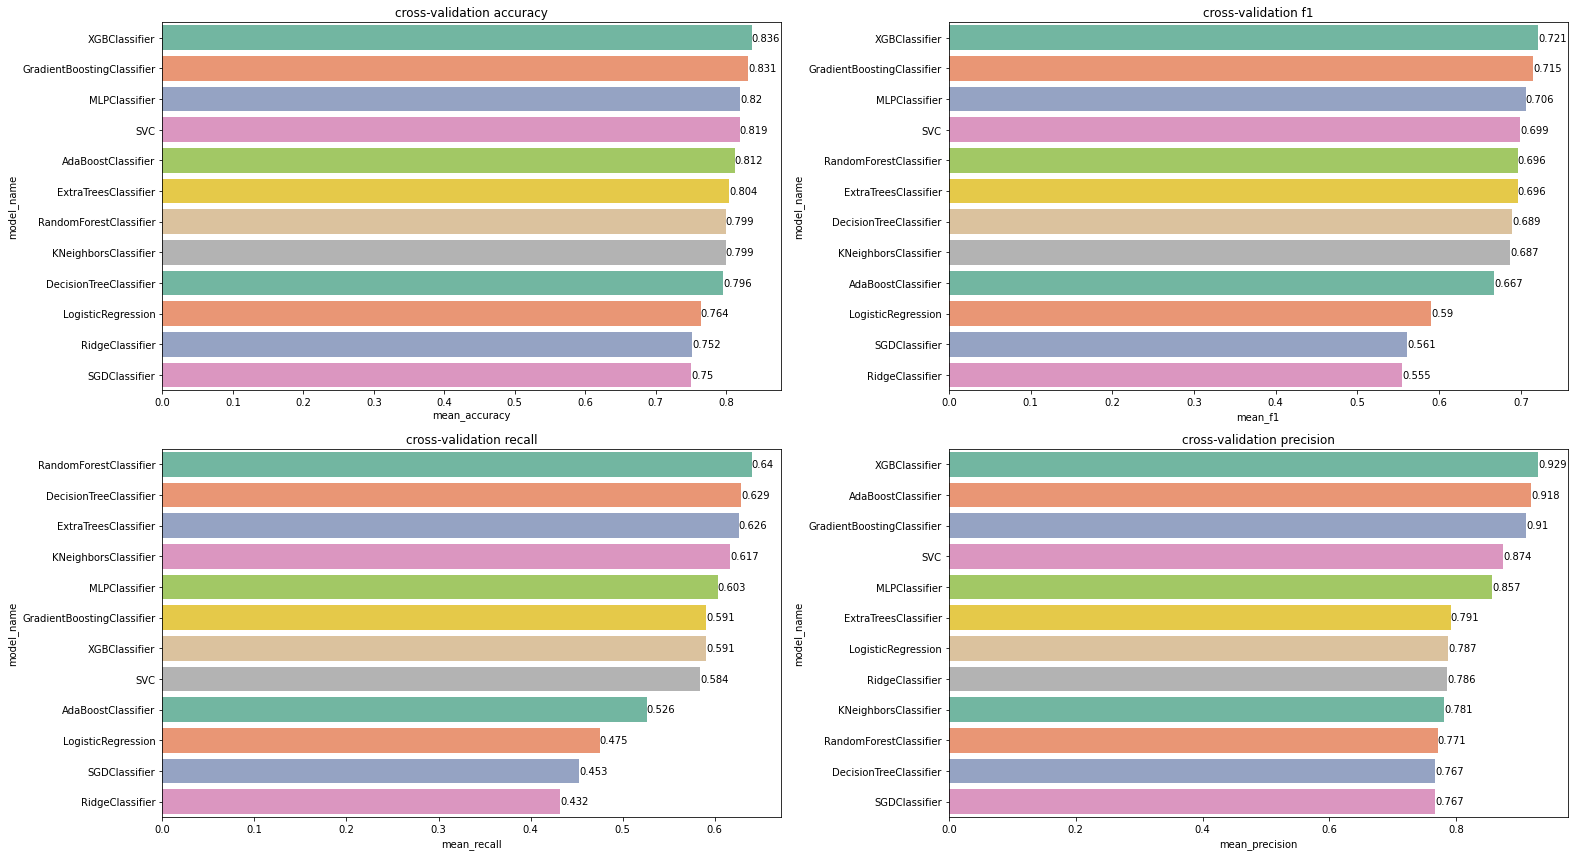

In [68]:
from sklearn.feature_selection import SelectFromModel

plot_data = defaultdict(list)

for clf in classifiers:
  clf_pipeline = Pipeline(
      steps = [
          ('preprocessor', preprocessor),
          ('feature_selection', SelectFromModel(
              ExtraTreesClassifier(random_state=0))),
          ('classifier', clf)
      ]
  )

  result = cross_validate(
      clf_pipeline,
      X_train,
      y_train,
      cv=folds,
      scoring=scoring,
      n_jobs=-1
  )

  plot_data['model_name'].append(clf_pipeline['classifier'].__class__.__name__)

  plot_data['mean_f1'].append(result['test_f1'].mean().round(3))
  plot_data['std_f1'].append(result['test_f1'].std().round(3))

  plot_data['mean_recall'].append(result['test_recall'].mean().round(3))
  plot_data['std_recall'].append(result['test_recall'].std().round(3))
  
  plot_data['mean_precision'].append(result['test_precision'].mean().round(3))
  plot_data['std_precision'].append(result['test_precision'].std().round(3))

  plot_data['mean_accuracy'].append(result['test_accuracy'].mean().round(3))
  plot_data['std_accuracy'].append(result['test_accuracy'].std().round(3))

plot_data_df = pd.DataFrame(plot_data)


n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(22,12))

curr_score = 0

for i in range(n_rows):
  for j in range(n_cols):
    order = plot_data_df.sort_values(
        by=f'mean_{scoring[curr_score]}', 
        ascending=False
    ).model_name

    sns.barplot(
        data=plot_data_df.round(3),
        y='model_name',
        x=f'mean_{scoring[curr_score]}',
        palette='Set2',
        order=order,
        ax=ax[i][j]
    )

    ax[i][j].bar_label(ax[i][j].containers[0])

    ax[i][j].set_title(f'cross-validation {scoring[curr_score]}')

    curr_score += 1

plt.tight_layout()

The accuracy did improve for some models along with other metrics.

## Hyperparameter tuning with GridSearch

Judging by the previous results these are the models that were selected for the hyperparameter tuning based on their performance in the previous barplots:
- XGBClassifier
- SVC
- RandomForestClassifier
- DecisionTreeClassifier
- KNN

In [111]:
models_param_grids = [
    (
        Pipeline(
            steps = [
                ('preprocessor', preprocessor),
                ('feature_selection', SelectFromModel(
                    ExtraTreesClassifier(random_state=0))),
                ('clf', XGBClassifier(random_state=0))
            ]
        ),
        {
            'clf__max_depth': [3, 6, 10],
            'clf__n_estimators': [50, 100, 200, 300, 400], 
            'clf__learning_rate': [
                0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1
            ]
        }
    ),
    (
        Pipeline(
            steps = [
                ('preprocessor', preprocessor),
                ('feature_selection', SelectFromModel(
                    ExtraTreesClassifier(random_state=0))),
                ('clf', SVC(random_state=0, probability=True))
            ]
        ),
        {
            'clf__C': [0.2, 0.4, 0.8, 1, 10, 100],
            'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        }
    ),
    (
        Pipeline(
            steps = [
                ('preprocessor', preprocessor),
                ('feature_selection', SelectFromModel(
                    ExtraTreesClassifier(random_state=0))),
                ('clf', RandomForestClassifier(random_state=0))
            ]
        ),
        {
            'clf__max_depth': [2, 5, 10, 20], 
            'clf__min_samples_leaf': [1, 3, 5, 20],
            'clf__n_estimators': [20, 50, 100, 200]
        }
    ),
    (
        Pipeline(
            steps = [
                ('preprocessor', preprocessor),
                ('feature_selection', SelectFromModel(
                    ExtraTreesClassifier(random_state=0))),
                ('clf', DecisionTreeClassifier(random_state=0))
            ]
        ),
        {
            'clf__max_depth': [2, 5, 10, 20], 
            'clf__min_samples_leaf': [1, 3, 5, 20]
        }
    ),
    (
        Pipeline(
            steps = [
                ('preprocessor', preprocessor),
                ('feature_selection', SelectFromModel(
                    ExtraTreesClassifier(random_state=0))),
                ('clf', KNeighborsClassifier())
            ]
        ), 
        {
            'clf__n_neighbors': range(1, 20)
        }
    )
]

It is hard to know if recall or precision will be more important so we will try to find the best parameters in terms of accuracy. 

In [112]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

best_estimators = {}

plot_data = defaultdict(list)

for model, param_grid in models_param_grids:
  grid_search = GridSearchCV(
      model, param_grid, cv=folds,
      scoring=scoring, n_jobs=-1,
      refit='accuracy', return_train_score=True
  )

  grid_search.fit(X_train, y_train)

  res = grid_search.cv_results_
  idx = grid_search.best_index_

  model_name = model['clf'].__class__.__name__

  plot_data['model_name'].append(model_name)
  plot_data['test'].append(1)
  plot_data['mean_f1'].append(res['mean_test_f1'][idx])
  plot_data['std_f1'].append(res['std_test_f1'][idx])
  plot_data['mean_recall'].append(res['mean_test_recall'][idx])
  plot_data['std_recall'].append(res['std_test_recall'][idx])
  plot_data['mean_precision'].append(res['mean_test_precision'][idx])
  plot_data['std_precision'].append(res['std_test_precision'][idx])
  plot_data['mean_accuracy'].append(res['mean_test_accuracy'][idx])
  plot_data['std_accuracy'].append(res['std_test_accuracy'][idx])

  plot_data['model_name'].append(model_name)
  plot_data['test'].append(0)
  plot_data['mean_f1'].append(res['mean_train_f1'][idx])
  plot_data['std_f1'].append(res['std_train_f1'][idx])
  plot_data['mean_recall'].append(res['mean_train_recall'][idx])
  plot_data['std_recall'].append(res['std_train_recall'][idx])
  plot_data['mean_precision'].append(res['mean_train_precision'][idx])
  plot_data['std_precision'].append(res['std_train_precision'][idx])
  plot_data['mean_accuracy'].append(res['mean_train_accuracy'][idx])
  plot_data['std_accuracy'].append(res['std_train_accuracy'][idx])

  best_estimators[model_name] = grid_search.best_estimator_

  print(f"Best {model_name} estimator: {grid_search.best_estimator_['clf']}\n")

plot_data_df = pd.DataFrame(plot_data)

# Save the best estimators and ploting data
plot_data_df.to_csv('plot_data.csv', index=False)

import joblib
import zipfile

with zipfile.ZipFile('gridsearch_data.zip','w') as new_zip_file:
  for name, clf in best_estimators.items():
    joblib.dump(clf, f'{name}.pkl')

    new_zip_file.write(
        f'{name}.pkl',
        compress_type=zipfile.ZIP_DEFLATED
    )

  new_zip_file.write(
      'plot_data.csv',
      compress_type=zipfile.ZIP_DEFLATED
  )

Best XGBClassifier estimator: XGBClassifier(n_estimators=50)

Best SVC estimator: SVC(C=0.2, gamma=1, probability=True, random_state=0)

Best RandomForestClassifier estimator: RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=50,
                       random_state=0)

Best DecisionTreeClassifier estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=0)

Best KNeighborsClassifier estimator: KNeighborsClassifier(n_neighbors=10)



The cell below will only be used when we want to load the best models and gridsearch metrics data from a zip file.

In [ ]:
zipfile.ZipFile('gridsearch_data.zip','r').extractall()

plot_data_df = pd.read_csv('plot_data.csv')

clfs = [
    'XGBClassifier', 'SVC', 'RandomForestClassifier', 
    'DecisionTreeClassifier', 'KNeighborsClassifier'
]

for clf in clfs:
  best_estimators[f'{clf}'] = joblib.load(f'{clf}.pkl')

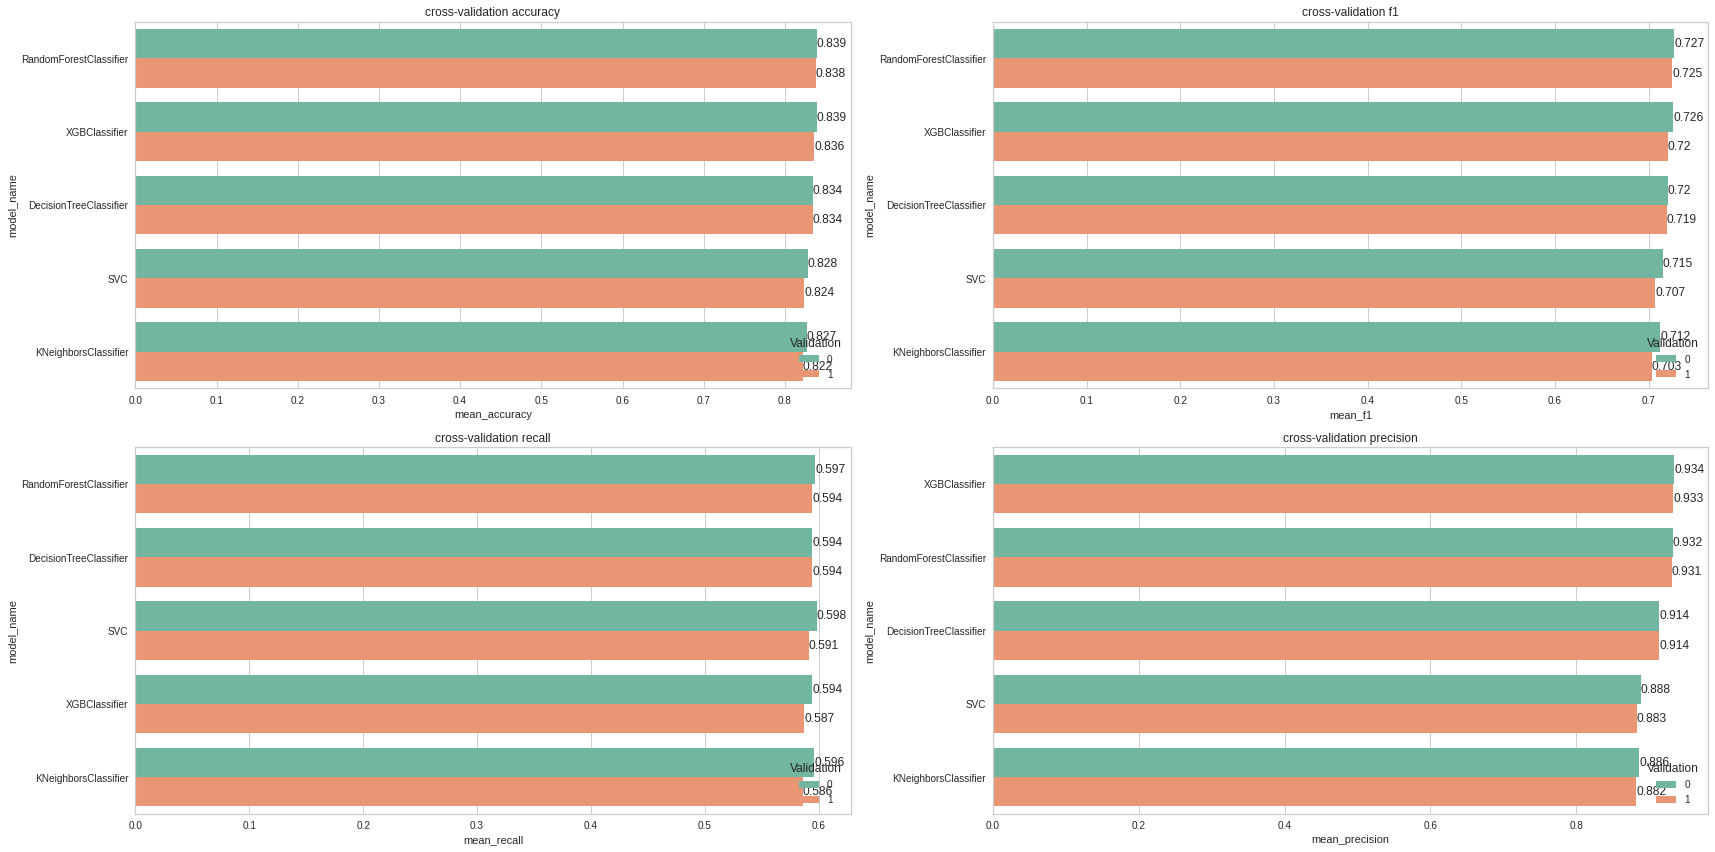

In [113]:
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(24,12))

curr_score = 0

for i in range(n_rows):
  for j in range(n_cols):
    order = plot_data_df[plot_data_df['test']==1].sort_values(
        by=f'mean_{scoring[curr_score]}', 
        ascending=False
    ).model_name.drop_duplicates()

    sns.barplot(
        data=plot_data_df.round(3),
        y='model_name',
        x=f'mean_{scoring[curr_score]}',
        hue='test',
        palette='Set2',
        order=order,
        ax=ax[i][j]
    )

    for container in ax[i][j].containers:
      ax[i][j].bar_label(container)

    ax[i][j].set_title(f'cross-validation {scoring[curr_score]}')

    ax[i][j].legend(loc='lower right', title='Validation')

    curr_score += 1

plt.tight_layout()

Here we can see cross-validation results for accuracy, f1, recall and precision metrics. These barplots show metrics of the best performing estimators for each classifier type, ordered by validation metrics in a descending order. The top estimators are mostly decision tree based ensemble methods like random forest, XGBoost and a simple decision tree. Although, their performance is very similar. We can also use these classifiers and see if we can get better performance by using them in a voting classifier.

In [114]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_estimators['XGBClassifier']['clf']), 
        ('svc', best_estimators['SVC']['clf']),
        ('rf', best_estimators['RandomForestClassifier']['clf']),
        ('dt', best_estimators['DecisionTreeClassifier']['clf']),
        ('knn', best_estimators['KNeighborsClassifier']['clf'])
    ],
    voting='soft',
    n_jobs=-1
)

voting_clf = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('feature_selection', SelectFromModel(
            ExtraTreesClassifier(random_state=0))),
        ('clf', voting_clf)
    ]
)

result = cross_validate(
    voting_clf,
    X_train,
    y_train,
    cv=folds,
    scoring=scoring,
    n_jobs=-1
)

print(f"Mean accuracy: {result['test_accuracy'].mean().round(3):<8}"
+f"std: {result['test_accuracy'].std().round(3)}")

print(f"Mean f1: {result['test_f1'].mean().round(3):<14}"
+f"std: {result['test_f1'].std().round(3)}")

print(f"Mean recall: {result['test_recall'].mean().round(3):<10}"
+f"std: {result['test_recall'].std().round(3)}")

print(f"Mean precision: {result['test_precision'].mean().round(3):<7}"
+f"std: {result['test_precision'].std().round(3)}")

best_estimators['VotingClassifier'] = voting_clf

Mean accuracy: 0.835   std: 0.017
Mean f1: 0.721         std: 0.038
Mean recall: 0.596     std: 0.048
Mean precision: 0.917  std: 0.024


We didn't get any improvement using the best estimators in a voting classifier.

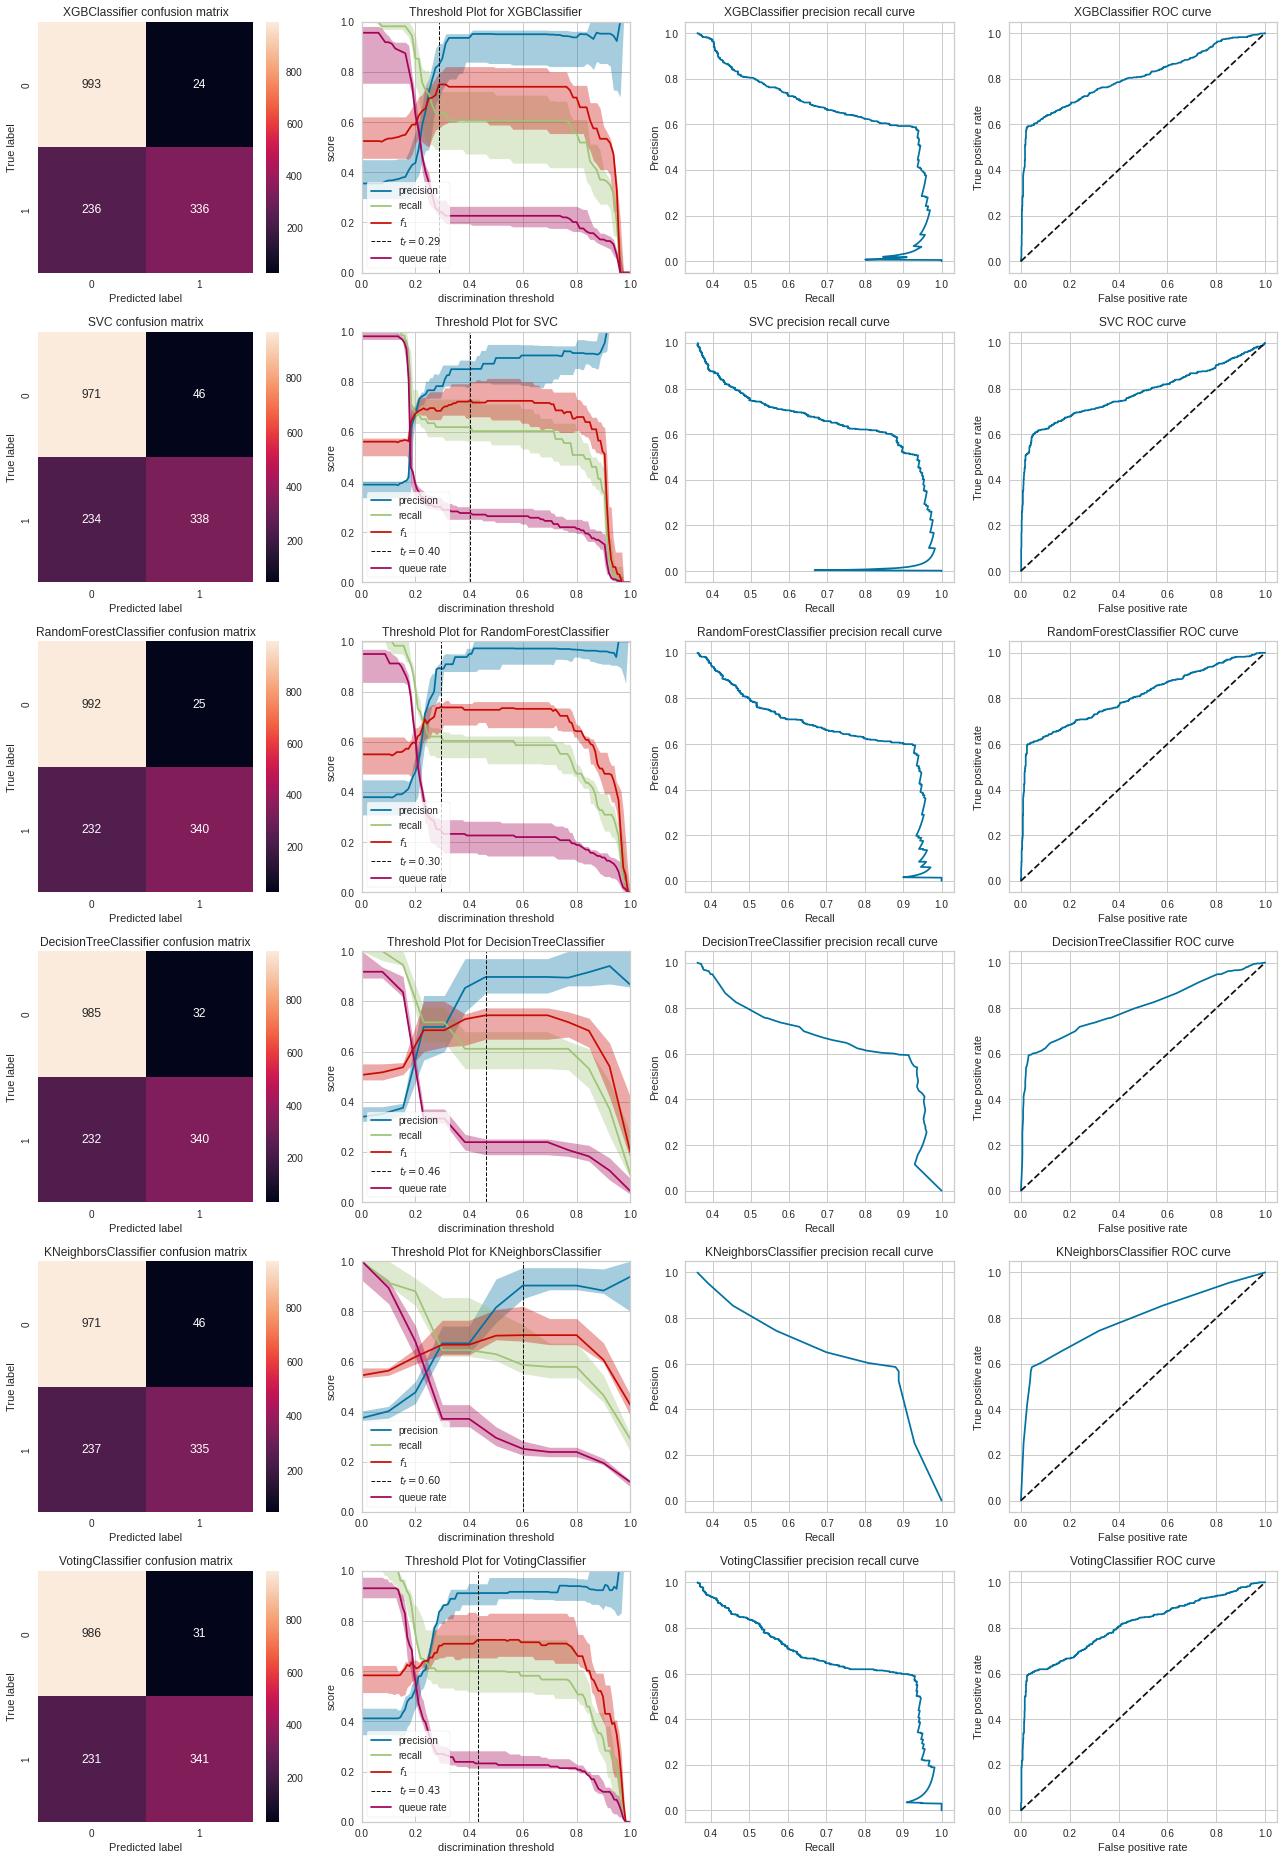

In [117]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

fig, ax = plt.subplots(len(best_estimators), 4, figsize=(18,26))

best_thresholds = {}

for i, (name, clf_pipeline) in enumerate(best_estimators.items()):
  clf_pipeline.fit(
      X_train,
      y_train
  )

  pred = cross_val_predict(
      clf_pipeline,
      X_train,
      y_train,
      cv=folds,
      n_jobs=-1
  )

  conf_mat = confusion_matrix(y_train, pred)

  sns.heatmap(
      data=conf_mat,
      annot=True,
      fmt='',
      ax=ax[i][0]
  )

  ax[i][0].set_title(f'{name} confusion matrix')
  ax[i][0].set_xlabel('Predicted label')
  ax[i][0].set_ylabel('True label')

  visualizer = DiscriminationThreshold(
      clf_pipeline, 
      ax=ax[i][1], 
      n_trials=folds
  )
  visualizer.fit(X_train, y_train)
  visualizer.finalize()

  best_thresholds[name] = visualizer.thresholds_[
      visualizer.cv_scores_[visualizer.argmax].argmax()
  ]


  pred = cross_val_predict(
      clf_pipeline,
      X_train,
      y_train,
      cv=folds,
      n_jobs=-1,
      method='predict_proba'
  )[:,1]

  precision, recall, thresholds = precision_recall_curve(y_train, pred)

  ax[i][2].plot(precision, recall)

  ax[i][2].set_title(f'{name} precision recall curve')
  ax[i][2].set_xlabel('Recall')
  ax[i][2].set_ylabel('Precision')

  fpr, tpr, thresholds = roc_curve(y_train, pred)

  ax[i][3].plot(fpr, tpr)

  ax[i][3].set_title(f'{name} ROC curve')
  ax[i][3].set_xlabel('False positive rate')
  ax[i][3].set_ylabel('True positive rate')
  ax[i][3].plot([0, 1], [0, 1], 'k--')

plt.tight_layout()

So from the confusion matrix plots we can see that our models classify true negatives quite well, but do not classify the true positives very well. The second plot shows precision/recall vs threshold which also shows a threshold which maximizes f1 score. The other two plots show the precsion/recall and tpr(recall)/fpr trade offs of each model and we use them to see what happens when we increase or decrease say precision.

We can now try using the thresholds generated by the DiscriminationThreshold to see if it will improve the classification quality.

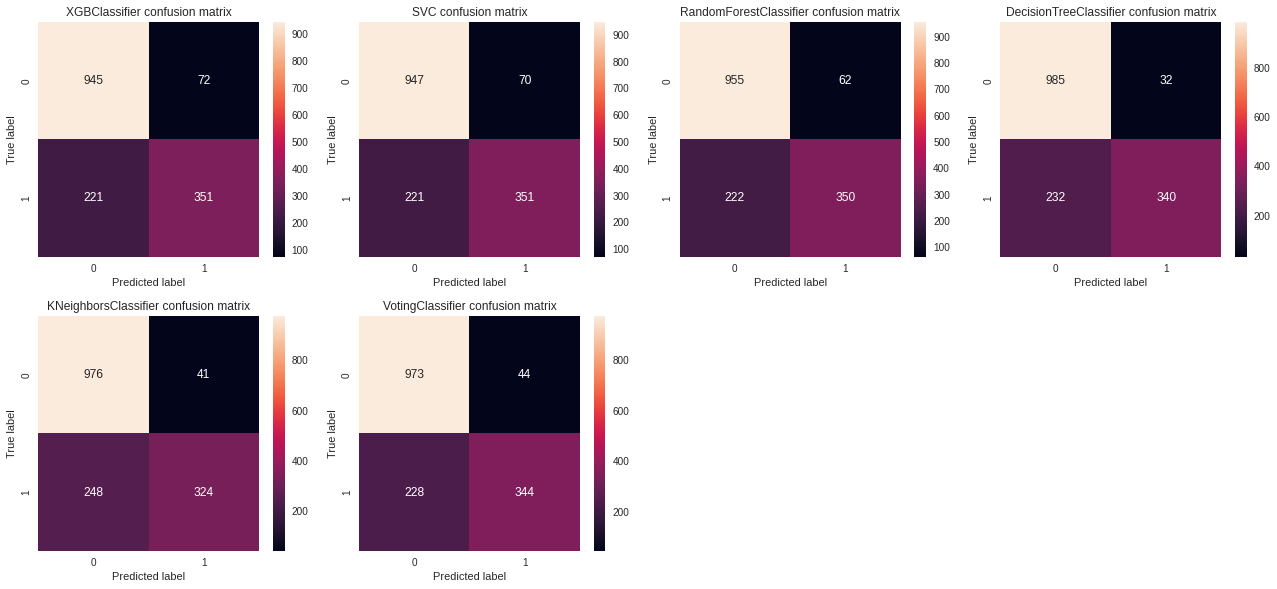

In [118]:
n_rows = 3
n_cols = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(18,12))

c_plot = 0

for i in range(n_rows):
  for j in range(n_cols):
    if c_plot==len(best_estimators):
      fig.delaxes(ax[i][j])
      continue

    (name, clf_pipeline) = list(best_estimators.items())[c_plot]

    clf_pipeline.fit(
        X_train,
        y_train
    )

    pred = cross_val_predict(
        clf_pipeline,
        X_train,
        y_train,
        cv=folds,
        n_jobs=-1,
        method='predict_proba'
    )

    pred = (pred[:,1] >= best_thresholds[name]).astype(bool)

    conf_mat = confusion_matrix(y_train, pred)

    sns.heatmap(
        data=conf_mat,
        annot=True,
        fmt='',
        ax=ax[i][j]
    )

    ax[i][j].set_title(f'{name} confusion matrix')
    ax[i][j].set_xlabel('Predicted label')
    ax[i][j].set_ylabel('True label')

    c_plot += 1

plt.tight_layout()

In some cases the amount of false negatives got slightly reduced, but also the amount of false positves increased.

## Evaluation

Let's now check how these models perform on the test set.

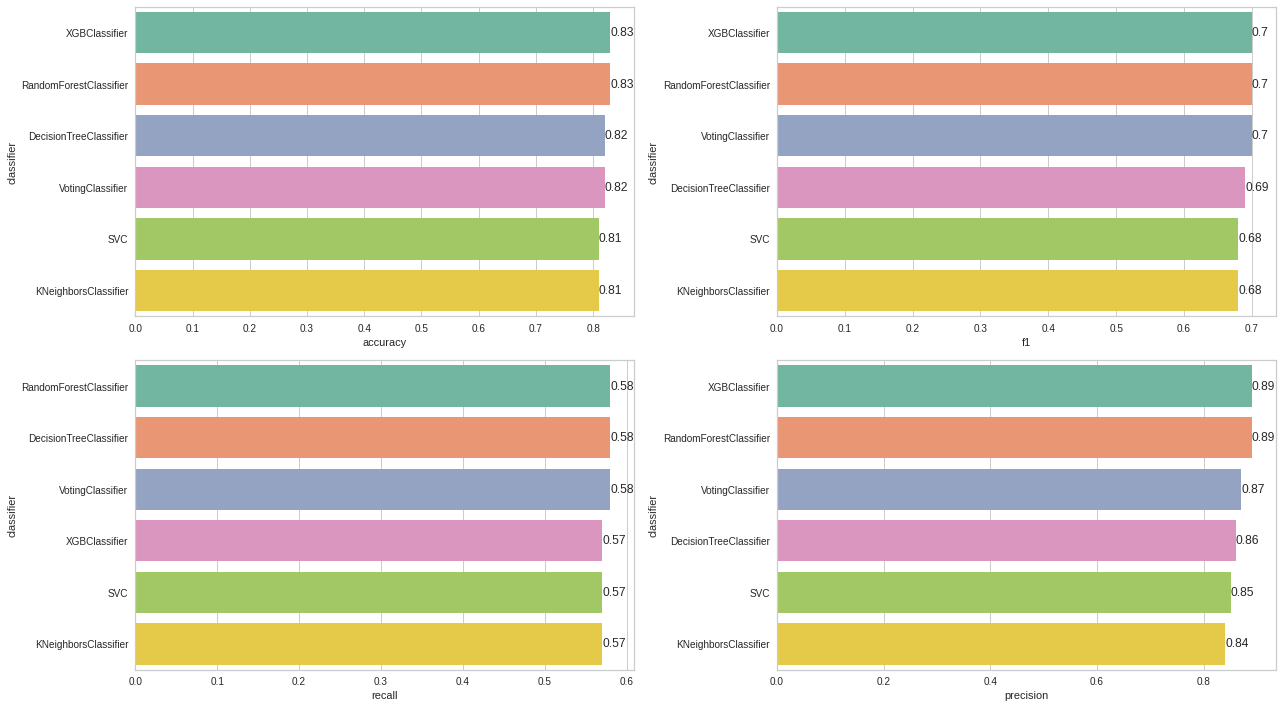

In [119]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
precision_score

X_test = test_df.drop(columns='TravelInsurance')
y_test = test_df['TravelInsurance']

test_result_data = defaultdict(list)

for name, clf_pipeline in best_estimators.items():
  clf_pipeline.fit(
      X_train,
      y_train
  )

  pred = clf_pipeline.predict(X_test)

  test_result_data['classifier'].append(name)
  test_result_data['accuracy'].append(accuracy_score(y_test, pred))
  test_result_data['f1'].append(f1_score(y_test, pred))
  test_result_data['recall'].append(recall_score(y_test, pred))
  test_result_data['precision'].append(precision_score(y_test, pred))

test_result_data_df = pd.DataFrame(test_result_data).round(2)

fig, ax = plt.subplots(2, 2, figsize=(18,10))

for i, score in enumerate(scoring):
  sns.barplot(
      data=test_result_data_df,
      x=score,
      y='classifier',
      palette='Set2',
      order=test_result_data_df.sort_values(
          by=score, 
          ascending=False
      ).classifier,
      ax=ax[1 if i>1 else 0][i-2 if i>1 else i]
  )

  ax[1 if i>1 else 0][i-2 if i>1 else i].bar_label(
      ax[1 if i>1 else 0][i-2 if i>1 else i].containers[0]
  )

plt.tight_layout()

We get similar results on the test set aswell which is good. Let's also see the confusion matrix, precision/recall and ROC curves.

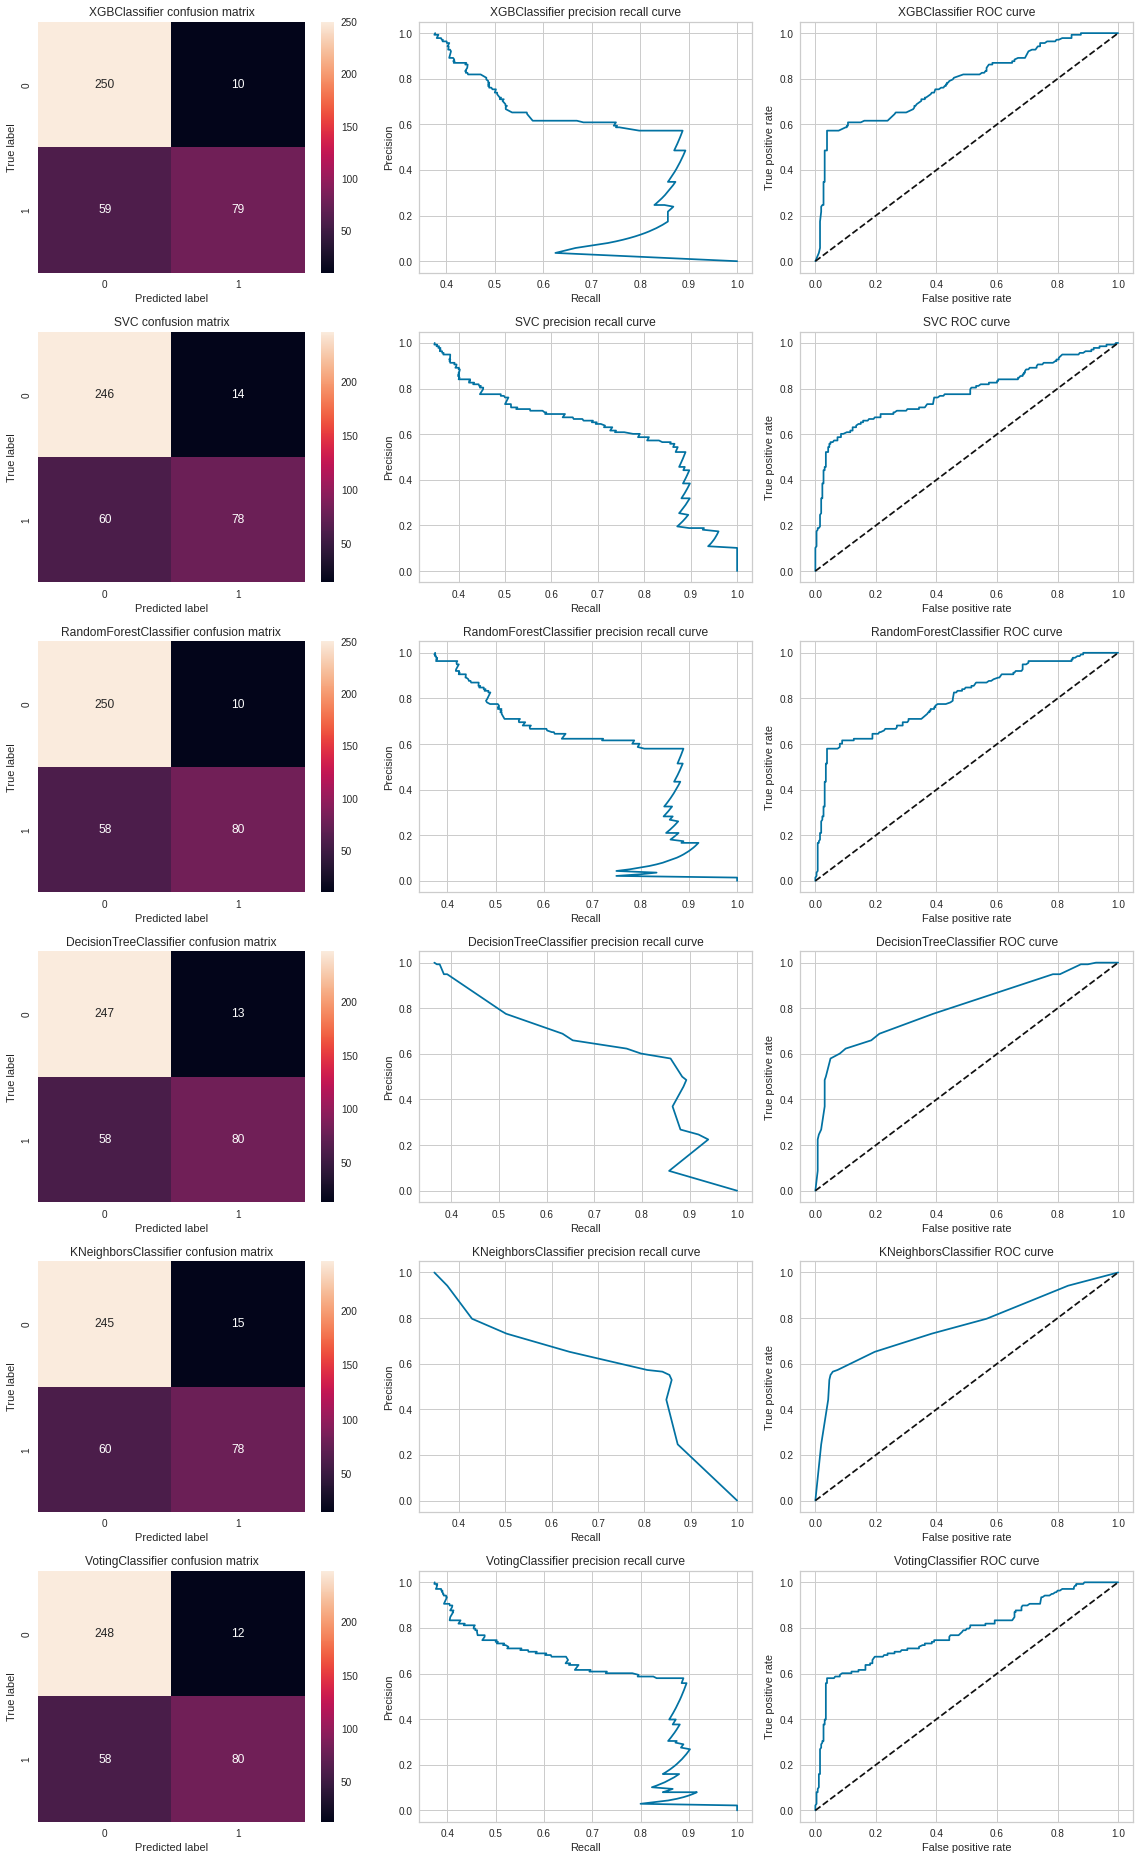

In [121]:
fig, ax = plt.subplots(len(best_estimators), 3, figsize=(16,26))

for i, (name, clf_pipeline) in enumerate(best_estimators.items()):
  clf_pipeline.fit(
      X_train,
      y_train
  )

  pred = clf_pipeline.predict(X_test)

  conf_mat = confusion_matrix(y_test, pred)

  sns.heatmap(
      data=conf_mat,
      annot=True,
      fmt='',
      ax=ax[i][0]
  )

  ax[i][0].set_title(f'{name} confusion matrix')
  ax[i][0].set_xlabel('Predicted label')
  ax[i][0].set_ylabel('True label')


  pred = clf_pipeline.predict_proba(X_test)[:,1]

  precision, recall, thresholds = precision_recall_curve(y_test, pred)

  ax[i][1].plot(precision, recall)

  ax[i][1].set_title(f'{name} precision recall curve')
  ax[i][1].set_xlabel('Recall')
  ax[i][1].set_ylabel('Precision')


  fpr, tpr, thresholds = roc_curve(y_test, pred)

  ax[i][2].plot(fpr, tpr)

  ax[i][2].set_title(f'{name} ROC curve')
  ax[i][2].set_xlabel('False positive rate')
  ax[i][2].set_ylabel('True positive rate')
  ax[i][2].plot([0, 1], [0, 1], 'k--')


plt.tight_layout()

We get similar performance among all the classifiers. Overall, we can see that we are not getting a lot of performance boost from the more complicated models. So it could be that a simple decision tree or KNN would suffice.

# Summary

So to conclude the main results from this project are:
- All the clients in the dataset are between 25-35 years of age, have an annual average income of 92K rupees and have 5 family members on average. Most of them don't have chronic deseases, work in private sector/self employed, not graduated, are not frequent flyers and never been abroad.
- Statistical tests showed that ChronicDiseases and GraduateOrNot feature proportions were similar in both buy and no buy insurance groups.
- Gridsearch Cross-Validation results show that, in terms of accuracy, the top 3 models are XGBoost, random forest and decision tree and their accuracy ranges between 0.838-0.834.
- According to feature importances the most important feature were EmploymentType, Age, GraduatedOrNot and EverTraveledAbroad.
- The test set results were similar to cross-validation and it seems like the performance of the more complicated models is similar to simpler models.

It could be possible to improve the models if the business requirements were known. This way it is possible to improve either recall or precision. Better recall model will capture more true positives, but the false positive rate will increase and the opposite for precision, so it depends on the needs.